<a href="https://colab.research.google.com/github/jujiss/probabilidade/blob/main/poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Distribuição de Poisson

Considere $\lambda>0$ a taxa de uma variável aleatória.
Assim, $$P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!}.$$

E $$E[X]=V(x)=\lambda.$$

A distribuição de Poisson é consequência da lei dos eventos raros, pois a distribuição binomial com n (quantidade de "experimentos") indo a infinito e p (probabilidade de sucesso) indo a zero se aproxima de uma distribuição de Poisson:
$$\lim_{n \to +\infty, p \to 0} \frac{n!}{(n-k)!k!}p^k(1-p)^{n-k}=\frac{e^{-\lambda}\lambda^k}{k!}$$

In [117]:
# numpy: biblioteca para tratar operações matemáticas de maneira vetorial
import numpy as np 

# matplotlib: biblioteca para criar simulações visuais de operações matemáticas
import matplotlib.pyplot as plt

P=  [3 7 9 ... 7 3 3]
k=  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


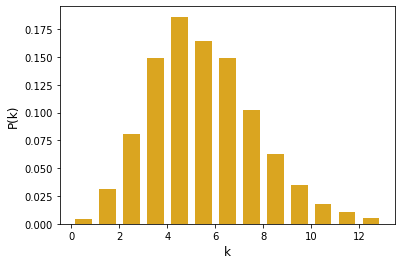

In [121]:
# taxa da variável aleatória (lambda)
l = 5
# número de pontos a serem retirados da distribuição
n = 1200
# cria amostras aleatórias de uma dist. de Poisson indo de l até n
P = np.random.poisson(l,n)
# retorna valores a partir de 0 até à maior amostra P
k = np.arange(0,np.max(P))

# count = conta o número de valores de cada amostra
# bins = define o extremo da amostra utilizada
# plt.hist = plotagem de um histograma (nesse caso, com as amostras de P)
# density(True) = density = counts / (sum(counts) * np.diff(bins)), para normalizar a área abaixo do histograma
# rwidth = tamanho das barras
count, bins, ignored = plt.hist(P, bins=k, density=True, color='goldenrod', rwidth=0.7)


print("P= ", P)
print("k= ", k)


# figura

plt.plot(figsize=(8,6))
plt.xlabel('k', fontsize=12)
plt.ylabel('P(k)', fontsize=12)
plt.show(True)

##Lei dos eventos raros

In [119]:
from matplotlib import pyplot as plt

# random: biblioteca parar criar sequências pseudo-aleatórias de números
# seed: dá a entrada para o gerador de números aleatórios
from random import seed

# biblioteca para criar distribuições estatísticas
# no caso, a distribuição binomial
from scipy.stats import binom

# para utilizar funções específicas, no caso, fatorial
from scipy.special import factorial

seed(90)

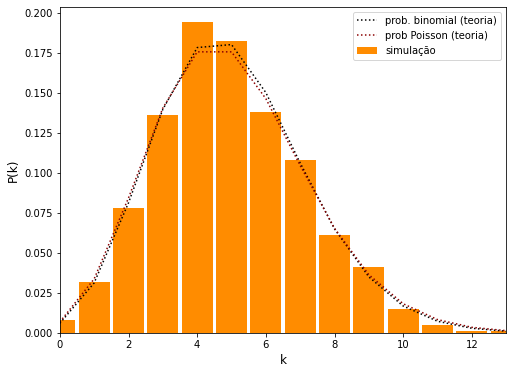

In [120]:
# probabilidade de sucesso
ps = 0.05
# quantidade de experimentos
nx = 100
# quantidade de simulações
sim = 1000
# cria arranjo só com zeros, na forma de nx
Pk = np.zeros(nx)
# retorna valores a partir de 0 até nx
vk = np.arange(0,nx)


# realiza as simulações
for j in range(0,sim):
# quantidade inicial de sucessos
  s = 0

# realiza os experimentos com valores aleatórios
  for m in range(0, nx):
    r = np.random.uniform()
# se o valor utilizado for menor ou igual à ps, sucesso
    if(r <= ps):
      s = s + 1
# adiciona o sucesso obtido ao arranjo Pk
  Pk[s] = Pk[s] + 1

# normaliza Pk
Pk = Pk/sum(Pk)
  

# figura (simulação)

plt.figure(figsize=(8,6))
plt.xlim(np.min(vk[Pk>0]),np.max(vk[Pk>0]))
plt.bar(vk, Pk, label='simulação', width=0.9, color='darkorange')


# figura (teórica binomial)

# cria arranjo só com zeros, na forma de nx+1
Pt = np.zeros(nx+1)
vt = np.arange(0, nx+1)

# realiza experimentos utilizando da fórmula da dist. binomial (q=k, p=ps, nx=n)
for q in range(0, nx+1):
  Pt[q] = (factorial(nx)/(factorial(nx-q)*factorial(q)))*(ps**q)*(1-ps)**(nx-q)
  
plt.plot(vt, Pt, linestyle='dotted', color='black', label='prob. binomial (teoria)')


# figura (teórica Poisson)

# cria arranjo só com zeros, na forma de nx+1
Pp = np.zeros(nx+1)
# retorna valores a partir de 0 até nx+1
vp = np.arange(0, nx+1)
# lambda é dado agora pela multiplicação entre a prob. dada e a quantidade de experimentos realizados
l = nx*ps

# realiza experimentos utilizando da fórmula da dist. de Poisson (t=k)
for t in range(0, nx+1):
  Pp[t] = (np.exp(-l)*l**t)/factorial(t)

plt.plot(vp, Pp, linestyle='dotted', color='darkred', label='prob Poisson (teoria)')
plt.xlabel('k', fontsize=12)
plt.ylabel('P(k)', fontsize=12)
plt.legend()
plt.show(True)